In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from scipy.stats import chi2_contingency,mannwhitneyu
sys.path.append('../src')
from utils.ClaseAbdon import DataFrameAnalyzer

In [39]:
df = pd.read_csv(r'..\data\raw\churn_telecomunicaciones.csv')

In [40]:
df.shape

(7043, 21)

In [41]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [42]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [43]:
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [44]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
df[df.duplicated()]

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: np.nan if x == ' ' else x)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'] = df['TotalCharges'].fillna(df.TotalCharges.median())

### Reemplazamos valores vacios por la mediana

In [48]:
df.drop(['customerID'], inplace=True, axis=1)

In [49]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')
df['SeniorCitizen'] =  df['SeniorCitizen'].map({1:'Yes',0:'No'})
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df[cols] = df[cols].replace('No internet service', 'No')


### Mapeamos no internet service por "No"

In [50]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

for col in cat_cols:
    unique_vals = df[col].unique()
    value_counts = df[col].value_counts()
    
    print(f"\n  {col.upper()} ({len(unique_vals)} valores √∫nicos)")
    print("=" * 50)
    
    for val in unique_vals:
        count = value_counts[val]
        percentage = (count / len(df)) * 100
        print(f"  ‚Ä¢ {val:<15} ‚Üí {count:>5} balance ({percentage:.1f}%)")


  GENDER (2 valores √∫nicos)
  ‚Ä¢ Female          ‚Üí  3488 balance (49.5%)
  ‚Ä¢ Male            ‚Üí  3555 balance (50.5%)

  SENIORCITIZEN (2 valores √∫nicos)
  ‚Ä¢ No              ‚Üí  5901 balance (83.8%)
  ‚Ä¢ Yes             ‚Üí  1142 balance (16.2%)

  PARTNER (2 valores √∫nicos)
  ‚Ä¢ Yes             ‚Üí  3402 balance (48.3%)
  ‚Ä¢ No              ‚Üí  3641 balance (51.7%)

  DEPENDENTS (2 valores √∫nicos)
  ‚Ä¢ No              ‚Üí  4933 balance (70.0%)
  ‚Ä¢ Yes             ‚Üí  2110 balance (30.0%)

  PHONESERVICE (2 valores √∫nicos)
  ‚Ä¢ No              ‚Üí   682 balance (9.7%)
  ‚Ä¢ Yes             ‚Üí  6361 balance (90.3%)

  MULTIPLELINES (2 valores √∫nicos)
  ‚Ä¢ No              ‚Üí  4072 balance (57.8%)
  ‚Ä¢ Yes             ‚Üí  2971 balance (42.2%)

  INTERNETSERVICE (3 valores √∫nicos)
  ‚Ä¢ DSL             ‚Üí  2421 balance (34.4%)
  ‚Ä¢ Fiber optic     ‚Üí  3096 balance (44.0%)
  ‚Ä¢ No              ‚Üí  1526 balance (21.7%)

  ONLINESECURITY (2 valores √∫nicos)

In [51]:
analyzer = DataFrameAnalyzer(df)

In [52]:
analyzer.resumen()

Columna Tipo de Dato  Cardinalidad  % Cardinalidad  \
0             gender       object             2            0.03   
1      SeniorCitizen       object             2            0.03   
2            Partner       object             2            0.03   
3         Dependents       object             2            0.03   
4             tenure        int64            73            1.04   
5       PhoneService       object             2            0.03   
6      MultipleLines       object             2            0.03   
7    InternetService       object             3            0.04   
8     OnlineSecurity       object             2            0.03   
9       OnlineBackup       object             2            0.03   
10  DeviceProtection       object             2            0.03   
11       TechSupport       object             2            0.03   
12       StreamingTV       object             2            0.03   
13   StreamingMovies       object             2            0.03   
14          Contract       object             3            0.04   
15  PaperlessBilling       object             2            0.03   
16     PaymentMethod       object             4            0.06   
17    MonthlyCharges      float64          1585           22.50   
18      TotalCharges      float64          6531           92.73   
19             Churn       object             2            0.03   

    Valores Faltantes  % Valores Faltantes           Categor√≠a  
0                   0                  0.0             Binaria  
1                   0                  0.0             Binaria  
2                   0                  0.0             Binaria  
3                   0                  0.0             Binaria  
4                   0                  0.0   Num√©rica Discreta  
5                   0                  0.0             Binaria  
6                   0                  0.0             Binaria  
7                   0                  0.0  Categ√≥rica Nominal  
8                   0                  0.0             Binaria  
9                   0                  0.0             Binaria  
10                  0                  0.0             Binaria  
11                  0                  0.0             Binaria  
12                  0                  0.0             Binaria  
13                  0                  0.0             Binaria  
14                  0                  0.0  Categ√≥rica Nominal  
15                  0                  0.0             Binaria  
16                  0                  0.0  Categ√≥rica Nominal  
17                  0                  0.0   Num√©rica Continua  
18                  0                  0.0   Num√©rica Continua  
19                  0                  0.0             Binaria

El dataset presenta una estructura limpia y completa, sin valores faltantes en ninguna de sus variables. Contiene un total de 20 columnas, siendo la mayor√≠a de tipo binario o categ√≥rico nominal, lo que sugiere un enfoque enfocado en las decisiones y caracter√≠sticas del cliente. Variables como tenure, MonthlyCharges y TotalCharges ofrecen informaci√≥n cuantitativa clave sobre la relaci√≥n con el cliente, siendo estas √∫ltimas especialmente relevantes por su alta cardinalidad. La variable objetivo Churn, de tipo binario, est√° bien definida y balanceada en t√©rminos de formato, lo que permitir√° abordar con claridad un problema de clasificaci√≥n supervisada.

Este dataset es adecuado para aplicar t√©cnicas de an√°lisis exploratorio, segmentaci√≥n y modelado predictivo para identificar patrones de abandono y generar estrategias de retenci√≥n.

In [53]:
analyzer.describe_numeric()

count         mean    median   mode      std_dev    min  \
tenure          7043.0    32.371149    29.000   1.00    24.559481   0.00   
MonthlyCharges  7043.0    64.761692    70.350  20.05    30.090047  18.25   
TotalCharges    7043.0  2281.916928  1397.475  20.20  2265.270398  18.80   

                    25%       50%      75%      max  skewness  kurtosis  
tenure            9.000    29.000    55.00    72.00  0.239540 -1.387372  
MonthlyCharges   35.500    70.350    89.85   118.75 -0.220524 -1.257260  
TotalCharges    402.225  1397.475  3786.60  8684.80  0.963789 -0.226400

Las variables num√©ricas muestran caracter√≠sticas distintas en cuanto a su distribuci√≥n:

- SeniorCitizen es una variable binaria codificada como 0 o 1, con solo un 16% de clientes mayores, lo que indica un desequilibrio en esta categor√≠a. La alta asimetr√≠a positiva (skewness = 1.83) confirma este sesgo hacia el valor 0.

- Tenure, que representa la antig√ºedad del cliente, tiene una media de 32 meses y una mediana de 29, con valores que van de 0 a 72 meses. Su distribuci√≥n es ligeramente asim√©trica hacia la derecha (skewness = 0.24) y presenta una curtosis negativa, lo que sugiere una distribuci√≥n m√°s achatada que una normal.

- MonthlyCharges tiene una distribuci√≥n bastante sim√©trica (skewness = -0.22) y un rango amplio (de $18.25 a $118.75), indicando que los clientes pagan tarifas muy variadas seg√∫n los servicios contratados.

- TotalCharges presenta una alta dispersi√≥n (std ‚âà 2265) y una asimetr√≠a moderada (skewness = 0.96), lo que refleja que algunos clientes acumulan cargos mucho m√°s altos, probablemente por mayor permanencia o servicios premium.

Estas variables ofrecen un valor anal√≠tico importante, ya que pueden ser indicadoras tanto del nivel de fidelizaci√≥n como del riesgo de abandono, especialmente cuando se cruzan con la variable Churn.

In [54]:
analyzer.describe_categorical()

unique_values     most_frequent  frequency  proportion
gender                        2              Male       3555       50.48
SeniorCitizen                 2                No       5901       83.79
Partner                       2                No       3641       51.70
Dependents                    2                No       4933       70.04
PhoneService                  2               Yes       6361       90.32
MultipleLines                 2                No       4072       57.82
InternetService               3       Fiber optic       3096       43.96
OnlineSecurity                2                No       5024       71.33
OnlineBackup                  2                No       4614       65.51
DeviceProtection              2                No       4621       65.61
TechSupport                   2                No       4999       70.98
StreamingTV                   2                No       4336       61.56
StreamingMovies               2                No       4311       61.21
Contract                      3    Month-to-month       3875       55.02
PaperlessBilling              2               Yes       4171       59.22
PaymentMethod                 4  Electronic check       2365       33.58
Churn                         2                No       5174       73.46

La mayor√≠a de las variables categ√≥ricas est√°n dominadas por una √∫nica categor√≠a. Por ejemplo, la mayor√≠a de los clientes no tienen dependientes (70%), no usan servicios como OnlineSecurity o TechSupport (m√°s del 70%) y tienen contrato mensual (55%).

Adem√°s, el 73% no ha abandonado el servicio, lo que indica un cierto desbalance en la variable objetivo (Churn), a considerar durante el modelado. Tambi√©n destaca el alto uso de electronic check como m√©todo de pago (34%).

Estos desequilibrios podr√≠an ser claves para identificar perfiles de riesgo de abandono.

------------------------------

## Detecci√≥n de Outliers.

In [55]:
def outliers(df, col, mode='detect'):
    """
    Detecta o elimina outliers usando el m√©todo IQR.

    Par√°metros:
        df : DataFrame
        col : str - nombre de la columna num√©rica
        mode : str - 'detect' para obtener los outliers, 'remove' para eliminarlos

    Retorna:
        DataFrame con los outliers detectados o con los outliers eliminados
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    if mode == 'detect':
        return df[(df[col] < lower) | (df[col] > upper)]
    elif mode == 'remove':
        return df[(df[col] >= lower) & (df[col] <= upper)]
    else:
        raise ValueError("El par√°metro 'mode' debe ser 'detect' o 'remove'")

In [56]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for var in num_features:
    outl = outliers(df,var,'detect')
    print(f'Outliers en {var}: {len(outl)}')

Outliers en tenure: 0
Outliers en MonthlyCharges: 0
Outliers en TotalCharges: 0


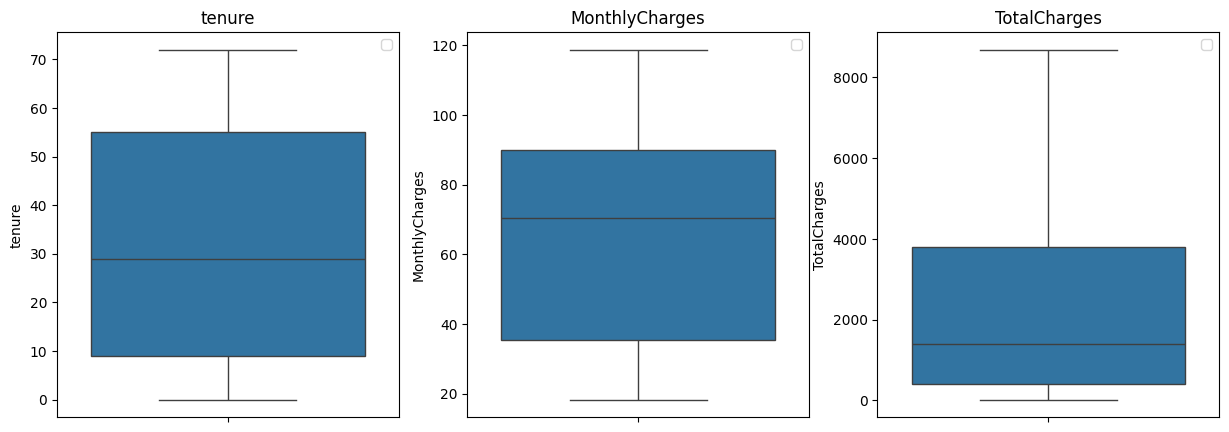

In [57]:
plt.figure(figsize=(15, 5))

for i, column in enumerate(num_features):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[column],showfliers=True)
    plt.title(f'{column}')
    plt.legend()

#### Tras aplicar la regla del IQR a las variables num√©ricas tenure, MonthlyCharges y TotalCharges, no se detectaron outliers extremos visualmente significativos. Aunque existen algunos valores altos en MonthlyCharges y TotalCharges, estos son coherentes con clientes de larga permanencia o servicios premium. Dado que los valores no resultan err√≥neos ni influyen negativamente en la interpretaci√≥n, se conservar√°n todos los registros para el an√°lisis y modelado.

-----------------------------------------------

## An√°lisis Univariante

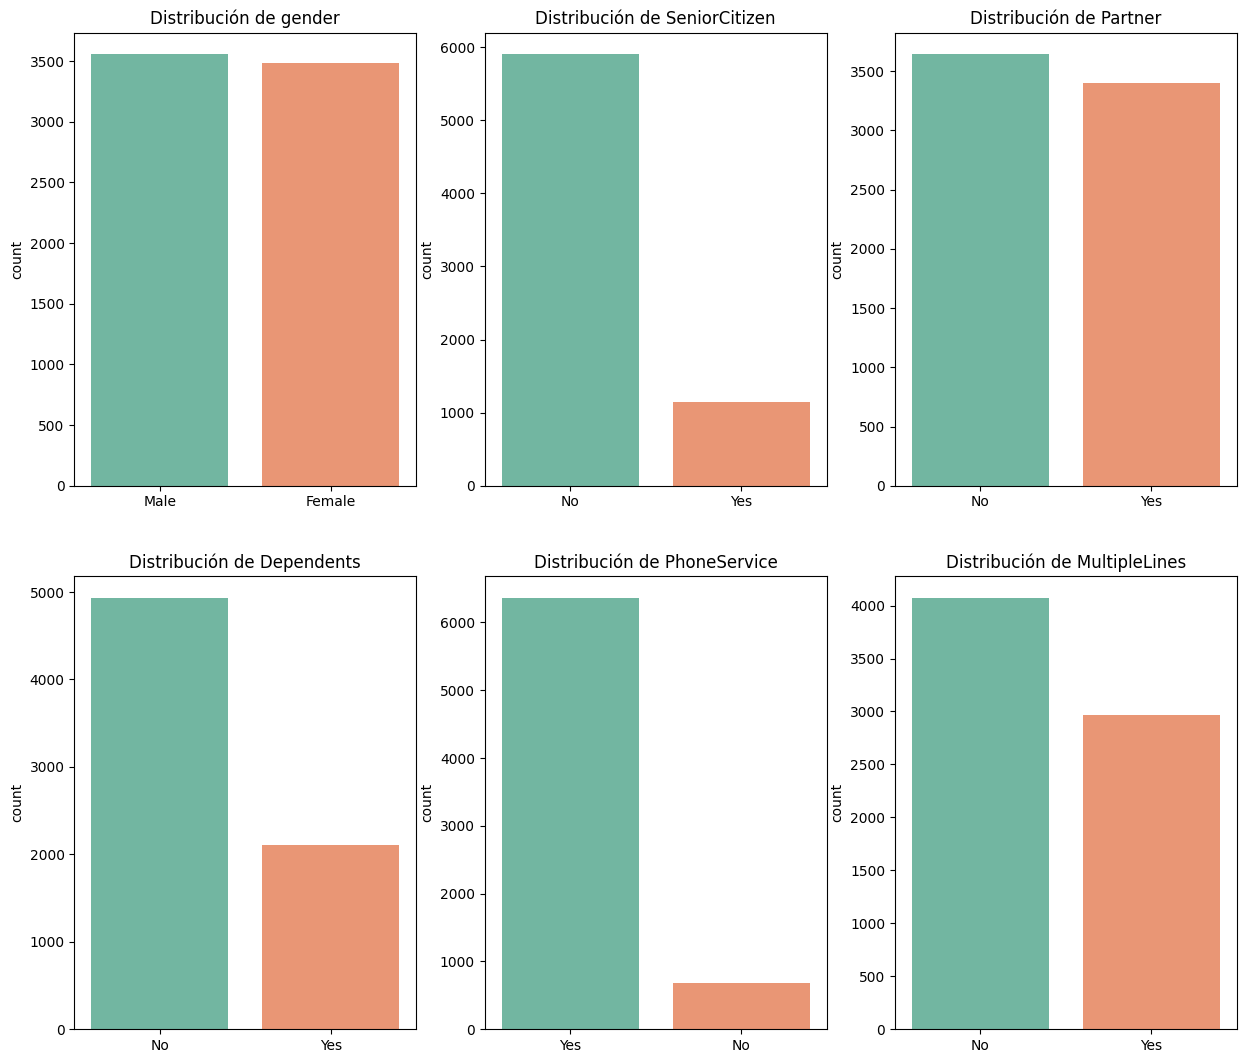

In [58]:
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                'MultipleLines', ]

plt.figure(figsize=(15, 20))

for i, column in enumerate(cat_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='Set2')
    plt.xlabel('')
    plt.title(f'Distribuci√≥n de {column}')

**gender:** La distribuci√≥n es equilibrada entre hombres y mujeres, por lo que no se espera que esta variable por s√≠ sola tenga gran poder discriminativo respecto al abandono.

**SeniorCitizen:** Solo un 16% de los clientes son mayores (valor 1), lo que indica una fuerte desproporci√≥n. Ser√° √∫til ver si este grupo tiene mayor tasa de abandono.

**PartneryDependents:** La mayor√≠a de los clientes no tienen pareja ni dependientes, lo que puede estar vinculado a un perfil m√°s independiente o joven.

**PhoneService:** M√°s del 90% tiene servicio telef√≥nico, por lo tanto no aportar√° mucha variabilidad al modelo por s√≠ sola.

**MultipleLines:** Hay una mayor proporci√≥n de clientes sin l√≠neas adicionales.

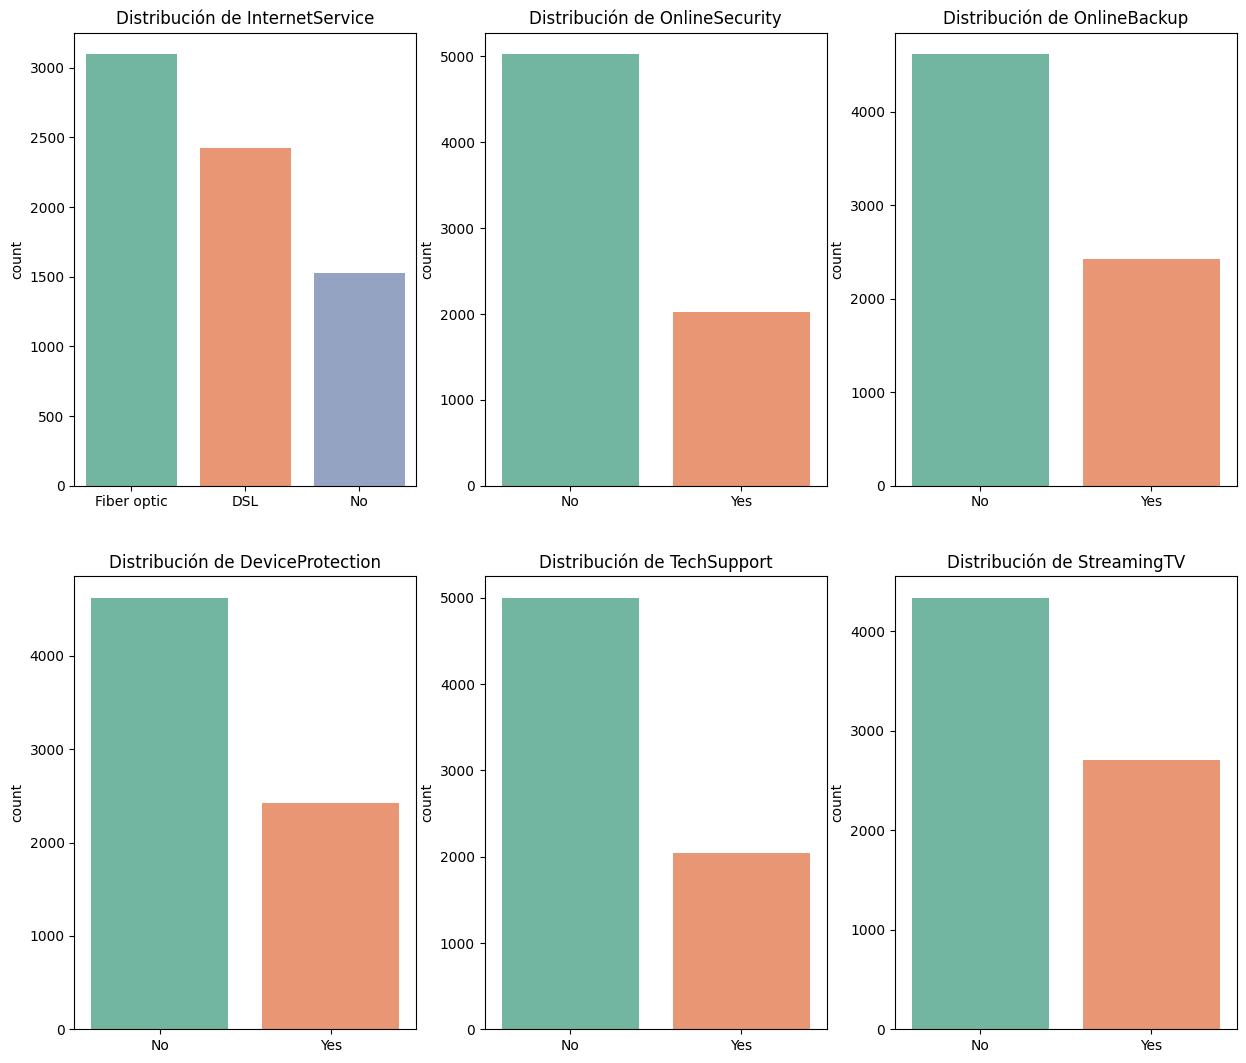

In [59]:
cat_features = ['InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', ]

plt.figure(figsize=(15, 20))

for i, column in enumerate(cat_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='Set2')
    plt.xlabel('')
    plt.title(f'Distribuci√≥n de {column}')

- **InternetService:** La mayor√≠a de los clientes tiene servicio de internet , principalmente por fibra √≥ptica , seguido por DSL. Un grupo minoritario no tiene internet, lo que podr√≠a limitar su uso de otros servicios adicionales.

- **Online Security, Online Backup, DeviceProtection, TechSupport:** En todos estos servicios, la categor√≠a "No" domina claramente , lo que indica que muchos clientes no contratan servicios complementarios de protecci√≥n o soporte. Esto podr√≠a estar vinculado a un menor nivel de fidelizaci√≥n o menor percepci√≥n de valor agregado.

- **StreamingTV:** La mayor√≠a no tiene contratado el servicio de televisi√≥n por streaming, aunque el grupo con ‚ÄúYes‚Äù tambi√©n es representativo.

La baja contrataci√≥n de servicios adicionales puede reflejar una relaci√≥n d√©bil con la empresa, y en an√°lisis posteriores ser√° clave ver si esto se asocia con mayor probabilidad de abandono **(Churn)**.

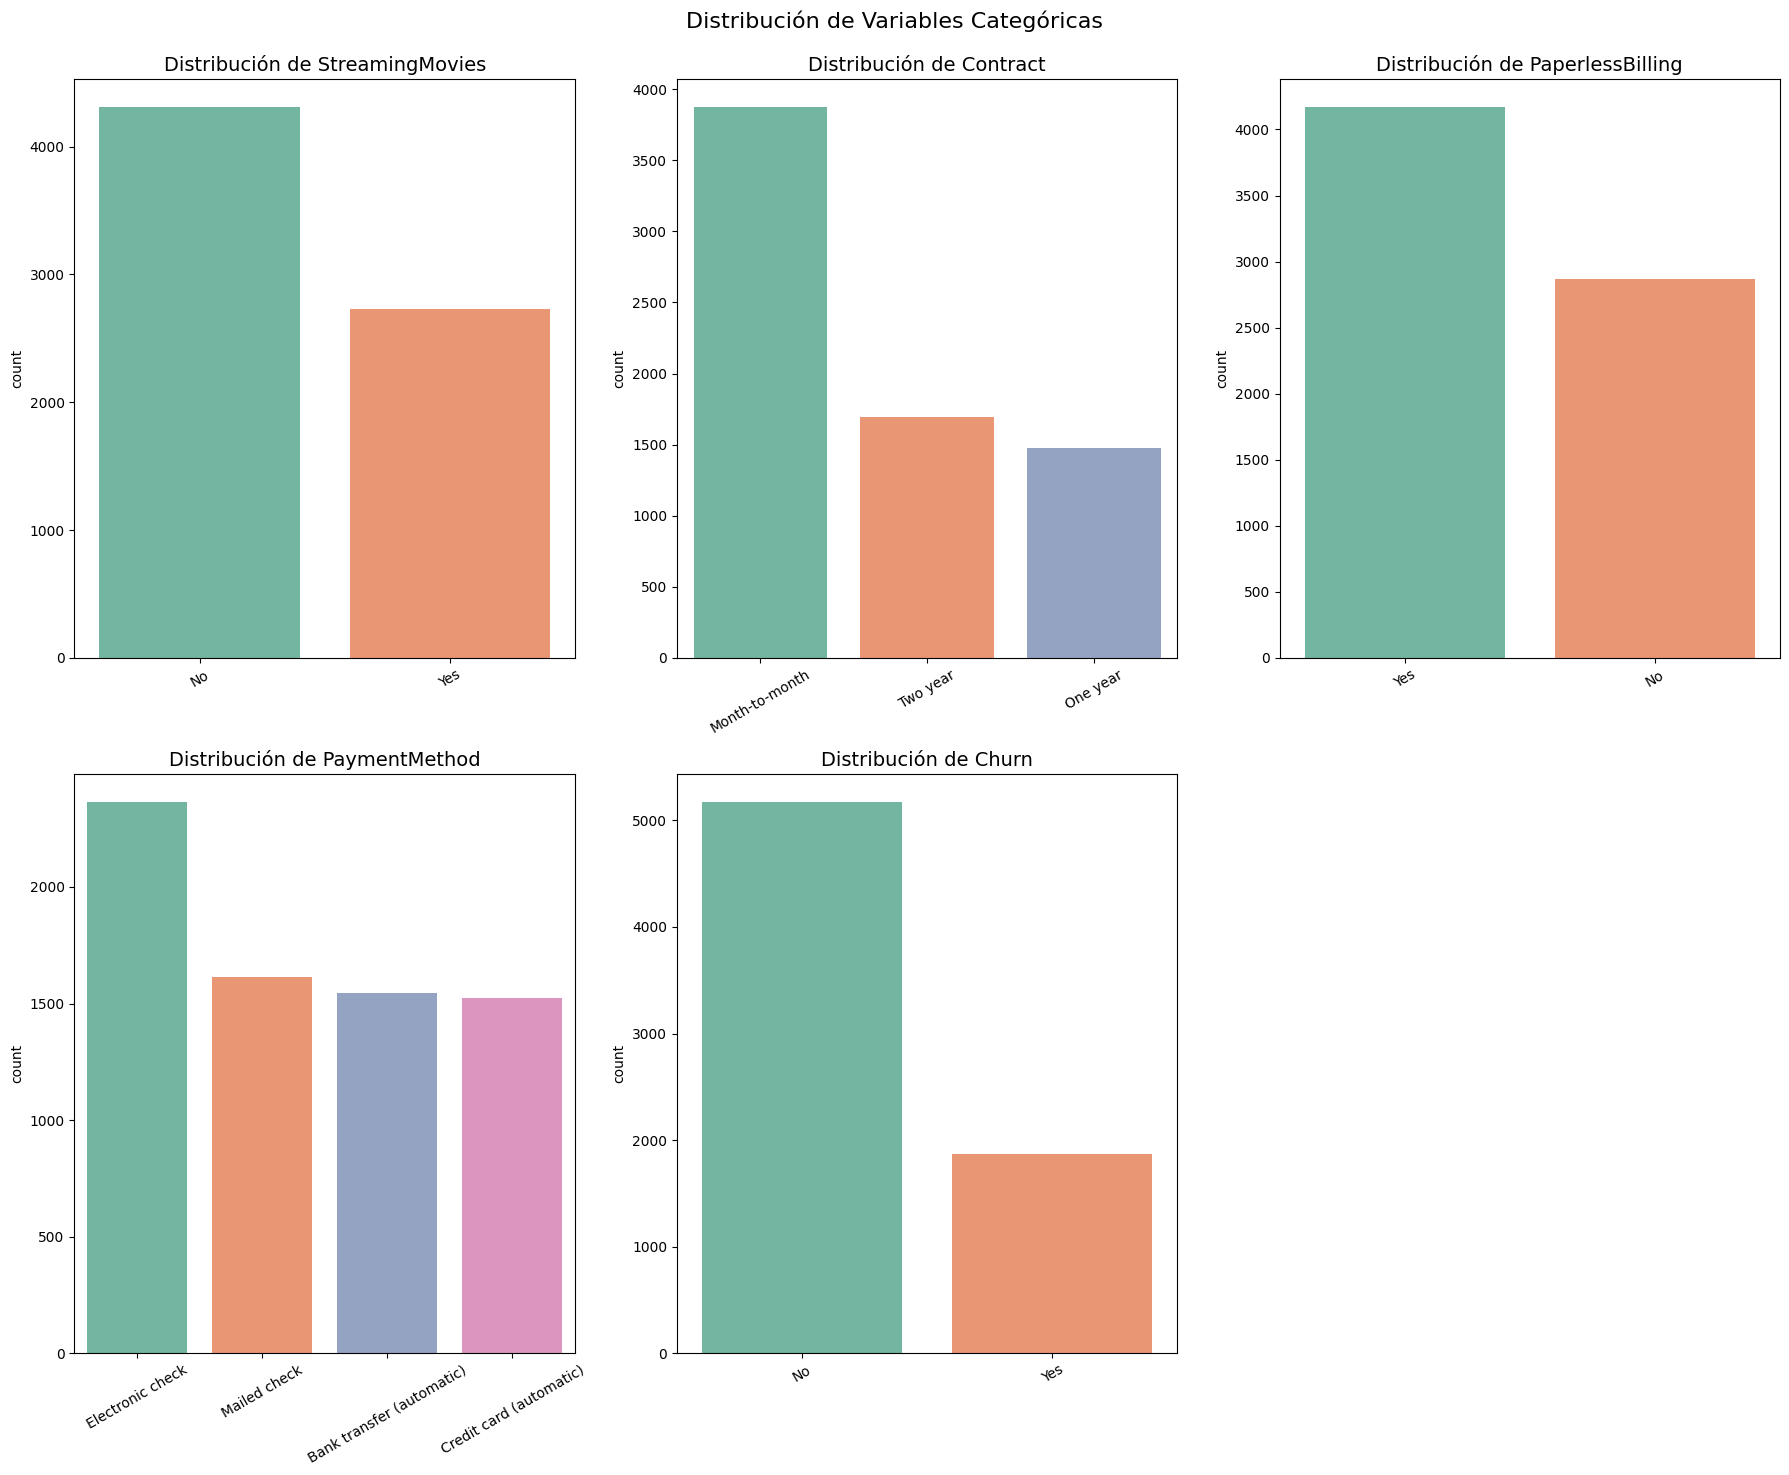

In [60]:
cat_features = ['StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize=(18, 15))

for i, column in enumerate(cat_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='Set2')
    plt.title(f'Distribuci√≥n de {column}', fontsize=14)
    plt.xlabel('')
    plt.xticks(rotation=30)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # deja espacio arriba
plt.suptitle('Distribuci√≥n de Variables Categ√≥ricas', fontsize=16)
plt.show()

**StreamingMovies:** La mayor√≠a de los clientes no tiene contratado este servicio. Puede indicar bajo inter√©s o falta de necesidad, aunque tambi√©n podr√≠a reflejar poca adopci√≥n de productos adicionales.

**Contract:** M√°s de la mitad de los clientes tiene contrato mensual, seguido por planes anuales. Los contratos mensuales suelen asociarse a mayor riesgo de abandono, algo a analizar en la fase bivariada.

**PaperlessBilling:** Hay una preferencia moderada por la facturaci√≥n electr√≥nica , lo que podr√≠a estar relacionado con h√°bitos m√°s digitales.

**PaymentMethod:** El m√©todo m√°s usado es ‚ÄúCheque electr√≥nico‚Äù, seguido por m√©todos autom√°ticos. Esta variable puede tener relevancia si ciertos m√©todos se asocian con mayor o menor abandono.

**Churn:** Solo el 27% de los clientes han abandonado, lo que implica un conjunto de datos desequilibrado. Esto deber√° considerar al aplicar modelos predictivos.

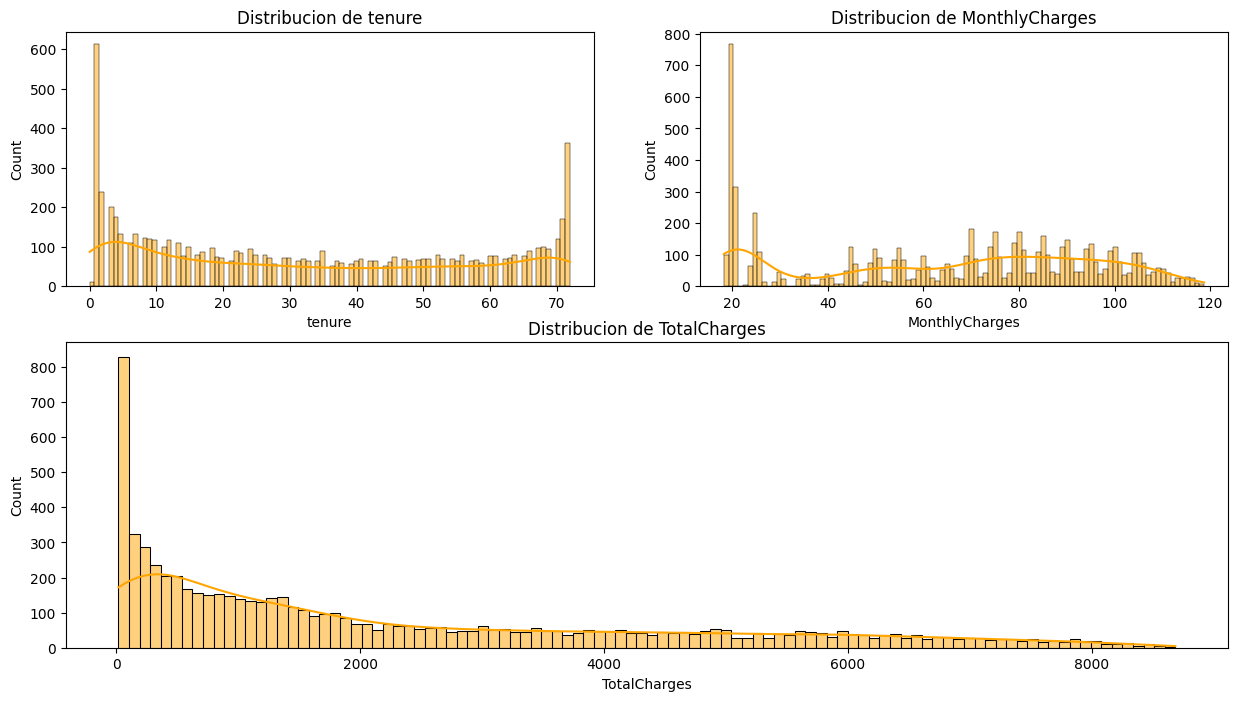

In [61]:
fig = plt.figure(figsize=(15, 8))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.2])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('Distribucion de tenure')
sns.histplot(
    df['tenure'],
    bins=100,
    kde=True,
    color='orange',ax=ax1)

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('Distribucion de MonthlyCharges')
sns.histplot(
    df['MonthlyCharges'],
    bins=100,
    kde=True,
    color='orange',ax=ax2)

ax3 = fig.add_subplot(gs[1, :])
ax3.set_title('Distribucion de TotalCharges')
sns.histplot(
    df['TotalCharges'],
    bins=100,
    kde=True,
    color='orange',ax=ax3);

**Tenure:** tiene una base de clientes bimodal muchos nuevos y muchos leales. Esto sugiere que hay una entrada constante de nuevos clientes, pero tambi√©n una porci√≥n significativa que permanece a largo plazo.

**MonthlyCharges:** La mayor√≠a de los clientes se agrupan en un rango medio de cargos mensuales, con una ligera cola hacia valores m√°s altos. La oferta de planes parece estar centrada en precios medios, aunque hay una fracci√≥n de clientes con cargos elevados que podr√≠an estar usando servicios premium.

**TotalCharges:** Hay una gran diversidad en el valor econ√≥mico de los clientes. Algunos apenas han generado ingresos (nuevos), mientras que otros representan un alto valor acumulado.

-------------------------------------------------------

### An√°lisis Bivariante

In [62]:
analyzer.test_normalidad()

['Columna: tenure               | Estad√≠stico: 76258.505174 | P-Valor: 0.0',
 'Columna: MonthlyCharges       | Estad√≠stico: 11419.528789 | P-Valor: 0.0',
 'Columna: TotalCharges         | Estad√≠stico: 808.866142 | P-Valor: 2.2748300837290998e-176']

Las variables tenure, MonthlyCharges y TotalCharges no siguen una distribuci√≥n normal, ya que en todos los casos el p-valor fue menor a 0.05. Esto indica que se rechaza la hip√≥tesis nula de normalidad para cada una de ellas. Se aplicaran tests estadisticos no parametricos.

-----------------------------------

Vamos a realizar test de CHI2 de todas las variables categoricas contra la target (churm).

In [63]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r - 1, k - 1))

In [64]:
cat_vars = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for var in cat_vars:
    tabla = pd.crosstab(df[var], df['Churn'])
    chi2, p, dof, ex = chi2_contingency(tabla)
    print(f"\n{var.upper()}:")
    print(f"Chi2 = {chi2:.2f}, p-valor = {p:.4f}")
    if p < 0.05:
        print("‚Üí Relaci√≥n estad√≠sticamente significativa con Churn ‚úÖ.")
        print(f"Tests Cramer's V = {round(cramers_v(df[var], df['Churn']),3)}")
    else:
        print("‚Üí No hay relaci√≥n significativa con Churn üî¥.")
        print(f"Tests Cramer's V = {round(cramers_v(df[var], df['Churn']),3)}")


GENDER:
Chi2 = 0.48, p-valor = 0.4866
‚Üí No hay relaci√≥n significativa con Churn üî¥.
Tests Cramer's V = 0.008

SENIORCITIZEN:
Chi2 = 159.43, p-valor = 0.0000
‚Üí Relaci√≥n estad√≠sticamente significativa con Churn ‚úÖ.
Tests Cramer's V = 0.15

PARTNER:
Chi2 = 158.73, p-valor = 0.0000
‚Üí Relaci√≥n estad√≠sticamente significativa con Churn ‚úÖ.
Tests Cramer's V = 0.15

DEPENDENTS:
Chi2 = 189.13, p-valor = 0.0000
‚Üí Relaci√≥n estad√≠sticamente significativa con Churn ‚úÖ.
Tests Cramer's V = 0.164

PHONESERVICE:
Chi2 = 0.92, p-valor = 0.3388
‚Üí No hay relaci√≥n significativa con Churn üî¥.
Tests Cramer's V = 0.011

MULTIPLELINES:
Chi2 = 11.14, p-valor = 0.0008
‚Üí Relaci√≥n estad√≠sticamente significativa con Churn ‚úÖ.
Tests Cramer's V = 0.04

INTERNETSERVICE:
Chi2 = 732.31, p-valor = 0.0000
‚Üí Relaci√≥n estad√≠sticamente significativa con Churn ‚úÖ.
Tests Cramer's V = 0.322

ONLINESECURITY:
Chi2 = 205.63, p-valor = 0.0000
‚Üí Relaci√≥n estad√≠sticamente significativa con Churn 

Se realiz√≥ un an√°lisis bivariante entre la variable objetivo `Churn(baja de clientes)` y M√∫ltiples variables categ√≥ricas utilizando la prueba de Chi-cuadrado de independencia, que permite evaluar si existe una relaci√≥n estad√≠sticamente significativa entre dos variables cualitativas. Como complemento, se aplic√≥ el estad√≠stico de Cram√©r's V, que cuantifica la fuerza de dicha relaci√≥n independientemente del tama√±o de la muestra.

Los resultados indican que no existe una asociaci√≥n significativa entre `gender y PhoneService` con la baja de clientes, ya que sus p-valores fueron superiores al umbral compartido aceptado (0.05). Adem√°s, sus valores de Cram√©r's V fueron extremadamente bajos (0.008 y 0.011 respectivamente), lo que refuerza la idea de que estas variables apenas aportan informaci√≥n √∫til respecto al comportamiento de baja.

Por otro lado, se detect√≥ una relaci√≥n estad√≠sticamente significativa (p < 0,05) entre Churn y variables como `SeniorCitizen, Partner, Dependents, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBillingy PaymentMethod.` No obstante, al complementar este an√°lisis con Cram√©r's V, se que observar√° que no todas las relaciones son iguales de intensas.

En particular, variables como `Contract(V = 0.41), InternetService(V = 0.322) y PaymentMethod(V = 0.303)` muestran una fuerte asociaci√≥n con la baja, por lo que pueden considerarse como variables clave para explicar o anticipar el abandono. Otras variables como `Partner, TechSupport, OnlineSecurityo SeniorCitizen` presentan una relaci√≥n significativa pero de intensidad baja a moderada, lo que indica que podr√≠an actuar como factores de soporte en un modelo, m√°s que como predictores principales.

En conjunto, estas variables son buenas candidatas para ser utilizadas en modelos predictivos de baja de clientes, o bien para dise√±ar estrategias de retenci√≥n personalizadas seg√∫n las caracter√≠sticas del.

In [65]:
significativas = ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']

for var in significativas:
    print('-'*40)
    print(f"\n{var.upper()}:")
    tabla = pd.crosstab(df[var], df['Churn'], normalize='index') * 100
    print(tabla.round(2))

----------------------------------------

SENIORCITIZEN:
Churn             No    Yes
SeniorCitizen              
No             76.39  23.61
Yes            58.32  41.68
----------------------------------------

PARTNER:
Churn       No    Yes
Partner              
No       67.04  32.96
Yes      80.34  19.66
----------------------------------------

DEPENDENTS:
Churn          No    Yes
Dependents              
No          68.72  31.28
Yes         84.55  15.45
----------------------------------------

MULTIPLELINES:
Churn             No    Yes
MultipleLines              
No             74.98  25.02
Yes            71.39  28.61
----------------------------------------

INTERNETSERVICE:
Churn               No    Yes
InternetService              
DSL              81.04  18.96
Fiber optic      58.11  41.89
No               92.60   7.40
----------------------------------------

ONLINESECURITY:
Churn              No    Yes
OnlineSecurity              
No              68.67  31.33
Yes            

**Perfil demogr√°fico:**
- `SeniorCitizen:` Los adultos mayores tienen una tasa de baja significativamente m√°s alta (41.68%) que los no mayores (23.61%).
- `Partner y Dependents:` Tener pareja o dependientes se asocia con menor tasa de baja. Esto sugiere que clientes con responsabilidades familiares tienden a ser m√°s estables.

**Servicios contratados:**
- `InternetService:` Los usuarios de Fiber optic presentan la tasa de baja m√°s alta (41.89%), mientras que los que no tienen servicio de internet tienen la m√°s baja (7.40%). Esto podr√≠a indicar problemas de satisfacci√≥n o precio en ese segmento.
- `OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport:` En todos los casos, tener el servicio contratado se asocia con una menor tasa de baja, lo que sugiere que estos servicios adicionales podr√≠an estar vinculados a una mayor fidelizaci√≥n.

**Entretenimiento:**
- `StreamingTV y StreamingMovies:` Los clientes que usan estos servicios tienen una tasa de baja ligeramente mayor, lo que podr√≠a estar relacionado con un perfil de cliente m√°s digital y posiblemente m√°s exigente.

**Tipo de contrato y facturaci√≥n:**
- `Contract:` La tasa de baja es mucho mayor en contratos mensuales (42.71%) en comparaci√≥n con contratos de uno o dos a√±os (11.27% y 2.83%, respectivamente). Esto refuerza la importancia de promover contratos a largo plazo.
- `PaperlessBilling:` Los clientes con facturaci√≥n electr√≥nica tienen una tasa de baja m√°s alta (33.57%), lo que podr√≠a estar relacionado con un perfil m√°s digital, similar al de los usuarios de servicios de streaming.

#### Los clientes con contratos mensuales, sin servicios adicionales, usuarios de fibra √≥ptica, y sin responsabilidades familiares presentan mayores tasas de baja. Estos perfiles deben ser el foco de estrategias de retenci√≥n personalizadas.

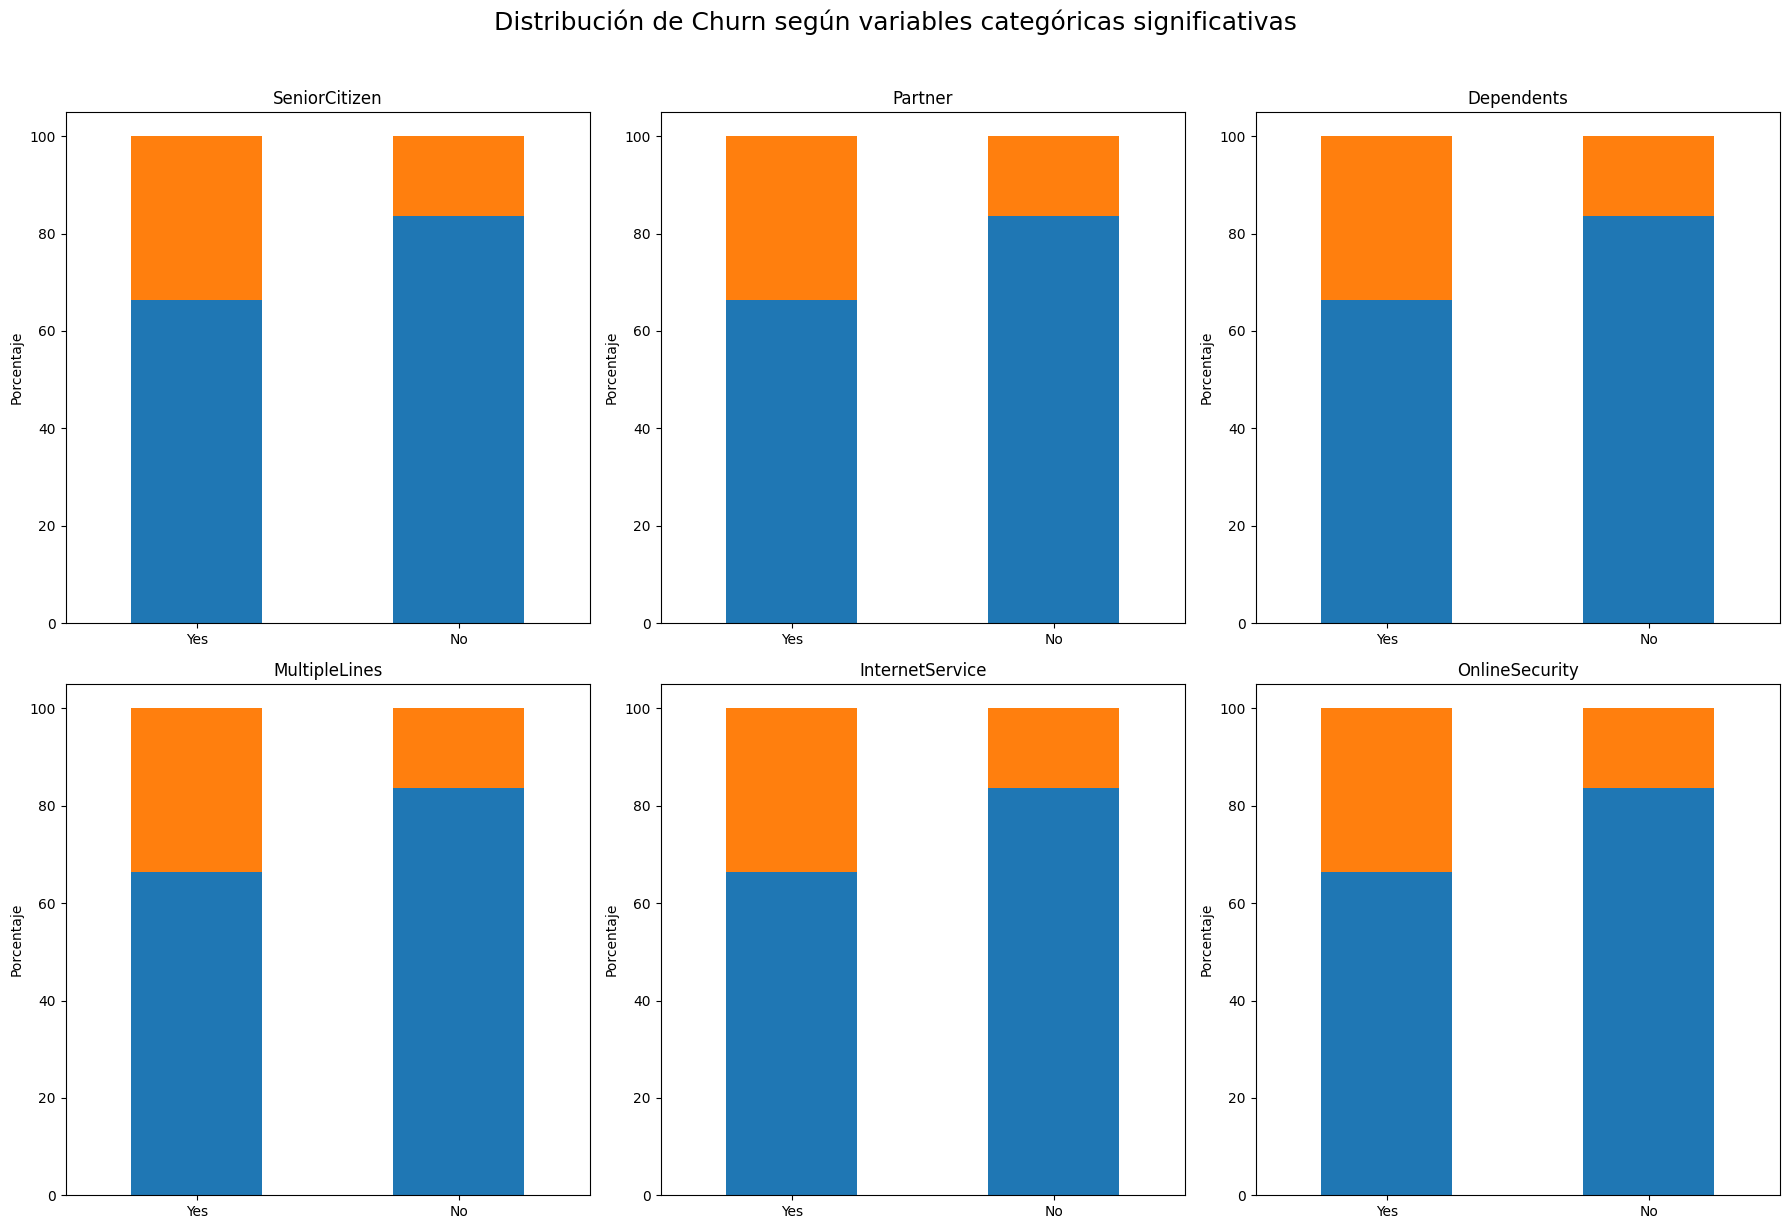

In [66]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()


for i, column in enumerate(significativas[0:6]):
    tabla = pd.crosstab(df[var], df['Churn'], normalize='index') * 100
    tabla = tabla.sort_values(by='Yes', ascending=False)
    tabla[['No', 'Yes']].plot(kind='bar', stacked=True, ax=axes[i], legend=False)
    axes[i].set_title(f"{column}")
    axes[i].set_ylabel("Porcentaje")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=0)
fig.suptitle("Distribuci√≥n de Churn seg√∫n variables categ√≥ricas significativas", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

#### Confirmando (visualmente) la conclusi√≥n anterior, las variables con relaci√≥n significativa con Churn muestran diferencias claras en las tasas de baja. Por ejemplo, los clientes sin dependientes (31.28%), usuarios de fibra √≥ptica (41.89%) y quienes tienen contrato mensual (42.71%) presentan porcentajes de baja considerablemente m√°s altos que sus contrapartes.

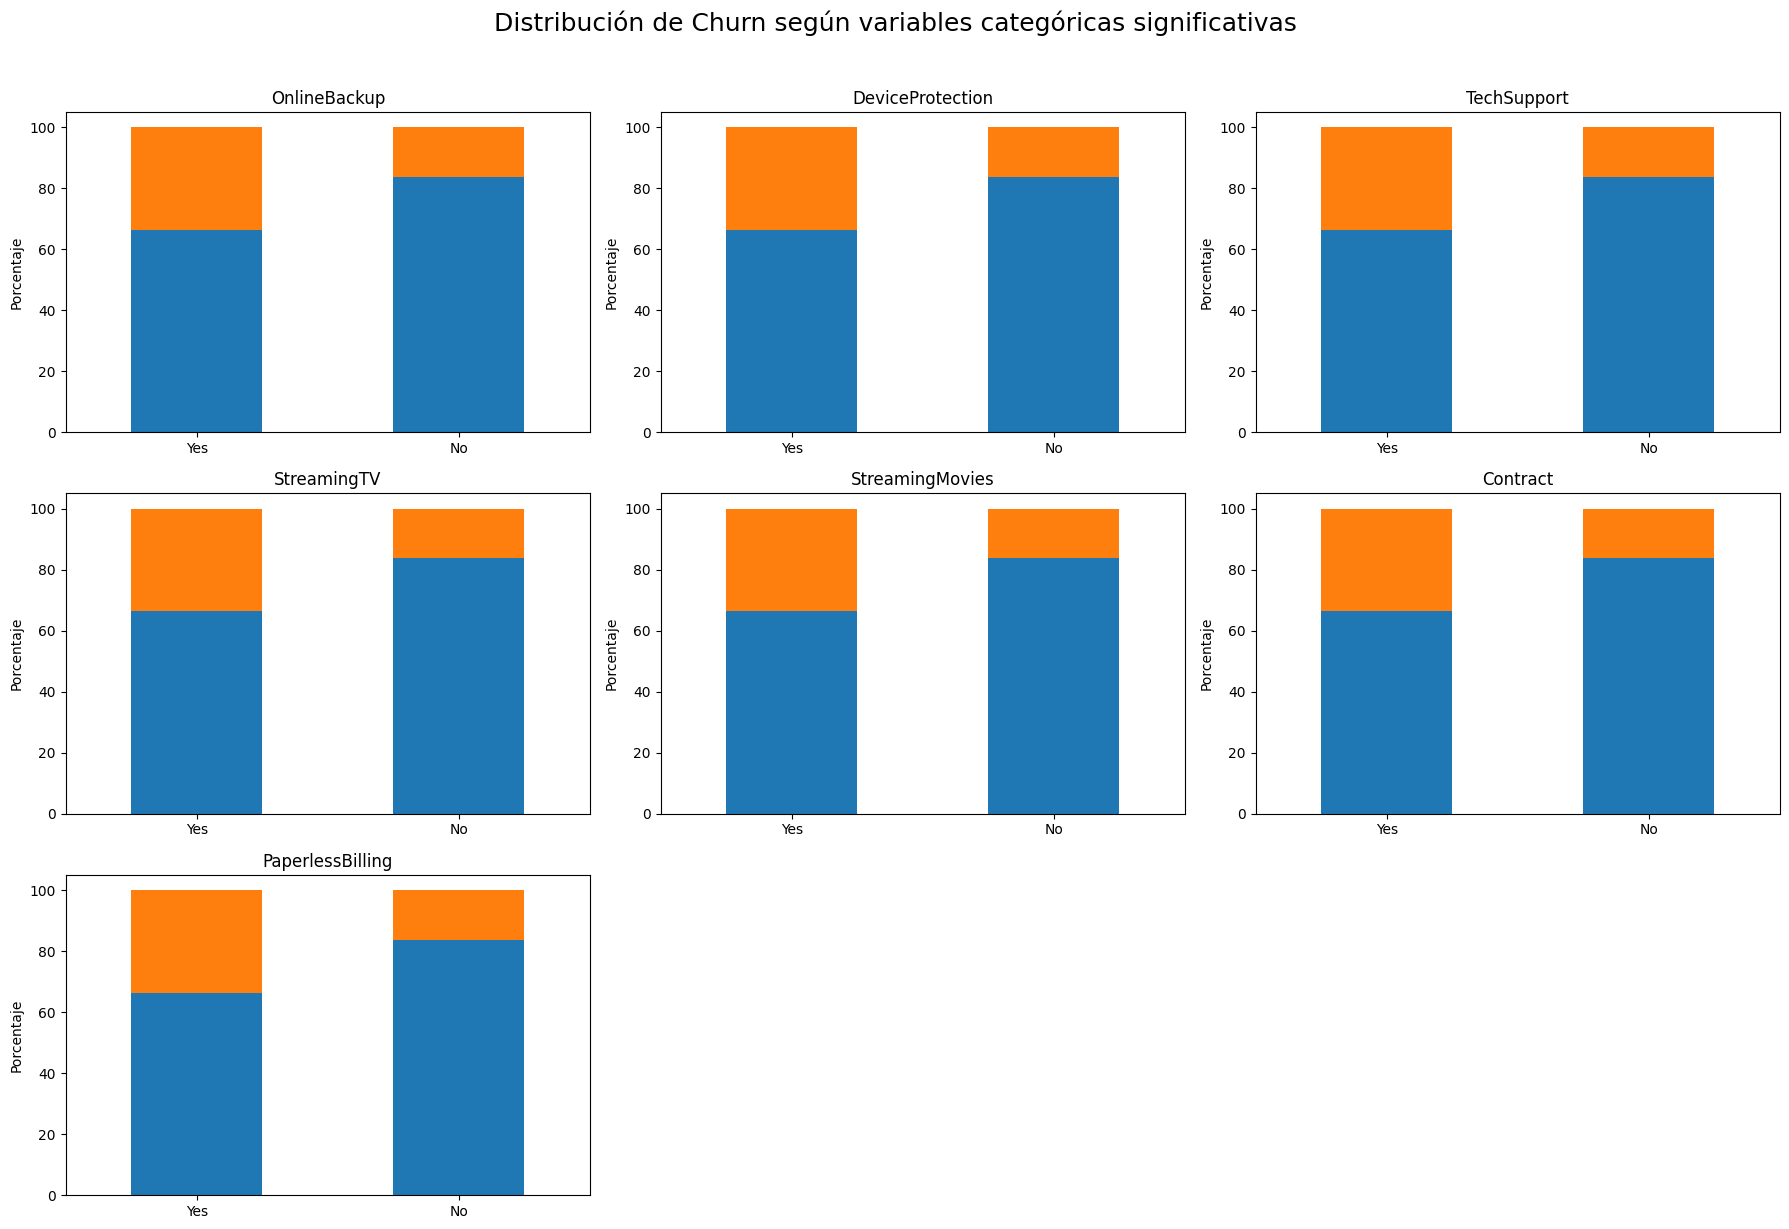

In [67]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()


for i, column in enumerate(significativas[6::]):
    tabla = pd.crosstab(df[var], df['Churn'], normalize='index') * 100
    tabla = tabla.sort_values(by='Yes', ascending=False)
    tabla[['No', 'Yes']].plot(kind='bar', stacked=True, ax=axes[i], legend=False)
    axes[i].set_title(f"{column}")
    axes[i].set_ylabel("Porcentaje")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=0)

for j in range(len(significativas[6::]), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distribuci√≥n de Churn seg√∫n variables categ√≥ricas significativas", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

#### Confirmando (visualmente) los resultados anteriores, los gr√°ficos muestran que los clientes que no tienen servicios como OnlineBackup, DeviceProtection o TechSupport, as√≠ como aquellos con contrato mensual o facturaci√≥n electr√≥nica, presentan porcentajes de baja notablemente m√°s altos. Estas diferencias visuales refuerzan la importancia de estas variables en la retenci√≥n de clientes.

In [68]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

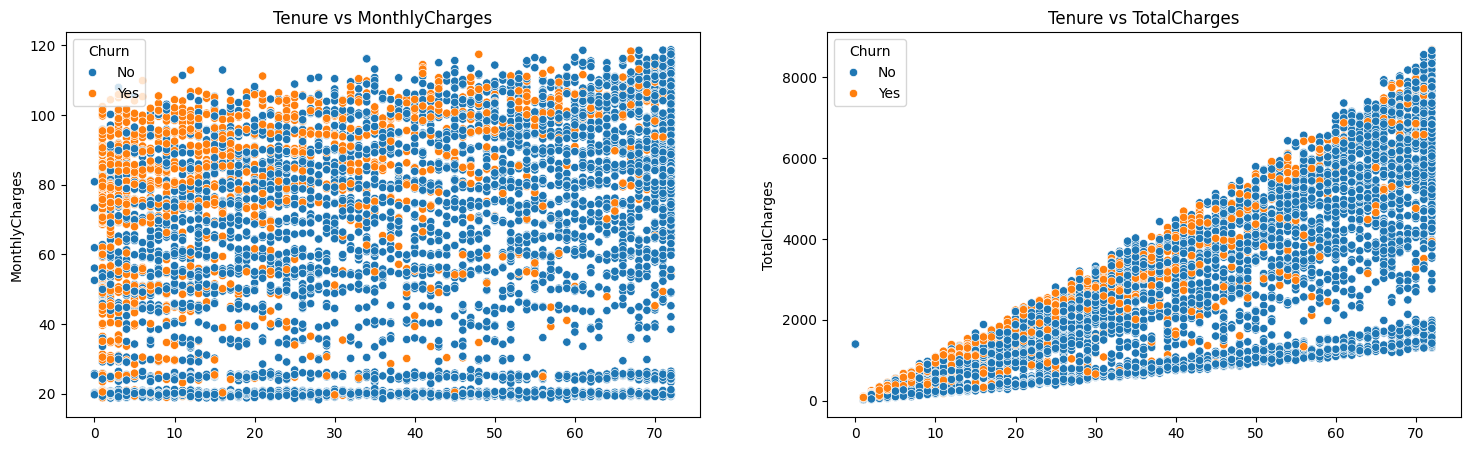

In [69]:
plt.figure(figsize=(18, 5))

for i, column in enumerate(num_cols[1::]):
    plt.subplot(1, 2, i+1)
    sns.scatterplot(data=df, x='tenure', y=column, hue='Churn')
    plt.xlabel('')
    plt.title(f'Tenure vs {column}')

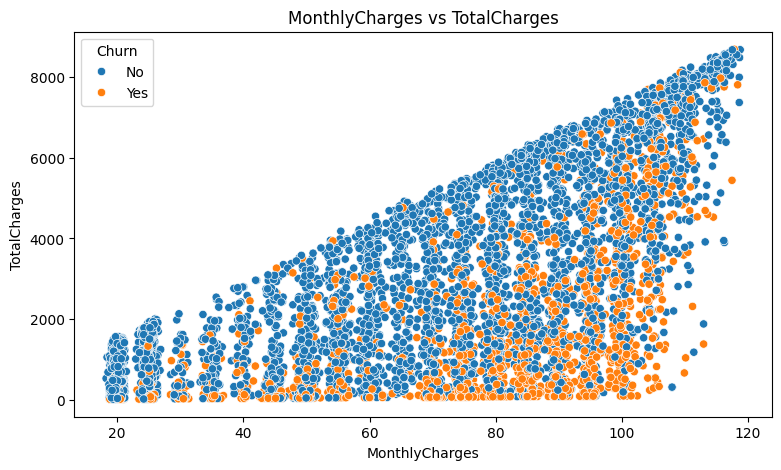

In [70]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.title('MonthlyCharges vs TotalCharges');

In [71]:
for var in num_cols:
    grupo_no = df[df["Churn"] == "No"][var].dropna()
    grupo_yes = df[df["Churn"] == "Yes"][var].dropna()
    
    stat, p = mannwhitneyu(grupo_no, grupo_yes, alternative='two-sided')
    
    print(f"\n{var.upper()}:")
    print(f"Mann‚ÄìWhitney U = {stat:.2f}, p-valor = {p:.4f}")
    print(f"Mediana (No): {grupo_no.median():.2f} | Mediana (Yes): {grupo_yes.median():.2f}")
    if p < 0.05:
        print("‚Üí Hay diferencia significativa entre los grupos.")
    else:
        print("‚Üí No hay diferencia significativa entre los grupos.")


TENURE:
Mann‚ÄìWhitney U = 7154668.00, p-valor = 0.0000
Mediana (No): 38.00 | Mediana (Yes): 10.00
‚Üí Hay diferencia significativa entre los grupos.

MONTHLYCHARGES:
Mann‚ÄìWhitney U = 3667080.50, p-valor = 0.0000
Mediana (No): 64.43 | Mediana (Yes): 79.65
‚Üí Hay diferencia significativa entre los grupos.

TOTALCHARGES:
Mann‚ÄìWhitney U = 6302281.00, p-valor = 0.0000
Mediana (No): 1679.53 | Mediana (Yes): 703.55
‚Üí Hay diferencia significativa entre los grupos.


Se aplic√≥ la prueba no param√©trica de Mann‚ÄìWhitney U para comparar la distribuci√≥n de tres variables num√©ricas ``(tenure, MonthlyCharges, TotalCharges)`` entre los grupos de clientes que se dieron de baja (Churn = Yes) y aquellos que permanecen en la empresa (Churn = No). Esta prueba es apropiada dado que las variables no presentan una distribuci√≥n normal y los grupos son independientes.

Los resultados fueron estad√≠sticamente significativos en los tres casos (p-valor < 0.0001), lo que indica que existen diferencias sustanciales en las distribuciones entre ambos grupos:

- ``Tenure (antig√ºedad):``
Los clientes que permanecen tienen una mediana de 38 meses , mientras que los que se dan de baja apenas alcanzan los 10 meses . Esto sugiere que los abandonos son m√°s frecuentes durante los primeros meses de servicio , lo cual puede deberse a una falta de fidelizaci√≥n o experiencia negativa inicial.

- ``Monthly Charges (cargo mensual):``
Los clientes que se dan de baja pagan, en general, m√°s al mes (mediana de 79,65 ‚Ç¨ frente a 64,43 ‚Ç¨). Esto indica que las tarifas m√°s altas podr√≠an estar asociadas a un mayor riesgo de abandono , posiblemente por percepci√≥n de coste elevado o insatisfacci√≥n con el valor ofrecido.

- ``Total Charges (cobros acumulados):``
Los clientes que permanecen han generado un monto total m√°s elevado (mediana de 1679,53 ‚Ç¨ vs. 703,55 ‚Ç¨), lo que es consistente con su mayor tiempo de permanencia . Es decir, los clientes con historial de pagos m√°s cortos tienden a abandonar antes .

En conjunto, estos resultados aportan evidencia cuantitativa para afirmar que los clientes nuevos y con cargos mensuales elevados est√°n m√°s propensos a abandonar , por lo que representan grupos prioritarios para acciones de retenci√≥n .



Text(0.5, 0, 'Churn')

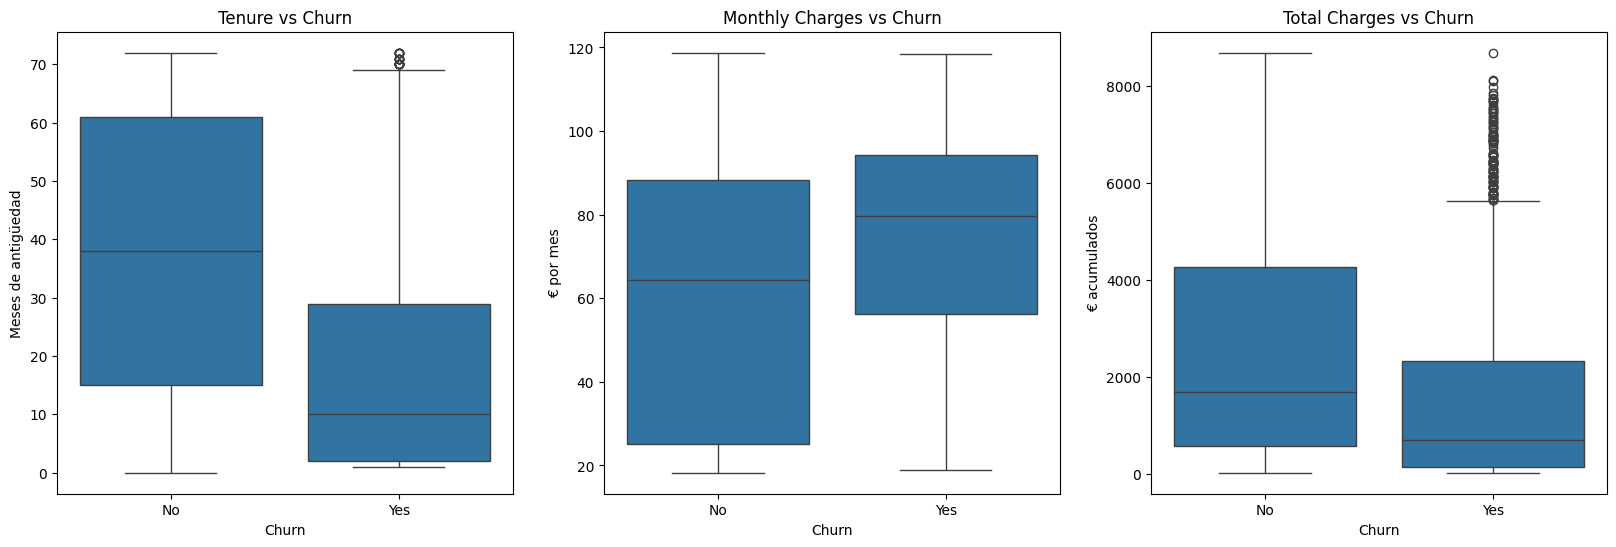

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.boxplot(x="Churn", y="tenure", data=df, ax=axes[0])
axes[0].set_title("Tenure vs Churn")
axes[0].set_ylabel("Meses de antig√ºedad")
axes[0].set_xlabel("Churn")

sns.boxplot(x="Churn", y="MonthlyCharges", data=df, ax=axes[1])
axes[1].set_title("Monthly Charges vs Churn")
axes[1].set_ylabel("‚Ç¨ por mes")
axes[1].set_xlabel("Churn")

sns.boxplot(x="Churn", y="TotalCharges", data=df, ax=axes[2])
axes[2].set_title("Total Charges vs Churn")
axes[2].set_ylabel("‚Ç¨ acumulados")
axes[2].set_xlabel("Churn")

#### Los gr√°ficos muestran diferencias claras entre clientes que se dan de baja (Churn = Yes) y los que permanecen (Churn = No):

- Tenure: Los que se quedan tienen mucha m√°s antig√ºedad (mediana 38 vs. 10).
Los abandonos ocurren en los primeros meses.

- Cargos Mensuales: Los que se dan de baja pagan m√°s al mes (mediana ~80 vs. ~64).
Cuotas altas se asocian a mayor churn.

- Cargos Totales: Los que se quedan han pagado mucho m√°s en total.
Refleja su permanencia y valor como cliente.

En resumen: clientes nuevos y con cargos mensuales altos son los m√°s propensos a darse de baja, y deben ser el foco de estrategias de retenci√≥n.

------------------------------------------------------------------

-------------------------------------------

## Conclusiones Generales del An√°lisis.

- ``Churn`` elevado en clientes nuevos. La mayor√≠a de los clientes que se dan de baja lo hacen en los primeros meses de relaci√≥n con la empresa (mediana de antig√ºedad: 10 meses vs. 38 en los que permanecen).
‚Üí Esto sugiere debilidad en la fase de fidelizaci√≥n inicial.

- Cargos mensuales altos = mayor riesgo de baja. Los clientes que abandonan pagan m√°s por mes en promedio.
‚Üí El precio puede estar percibi√©ndose como excesivo o no justificado por el servicio recibido.

- Clientes de mayor valor tienden a quedarse. Aquellos que no se dan de baja han generado m√°s ingresos totales (mayor ``TotalCharges``).
‚Üí Invertir en su fidelizaci√≥n puede tener un alto retorno.

- Relaciones significativas con variables de servicio y facturaci√≥n. Variables como ``Contract, InternetService, OnlineSecurity, TechSupporty PaymentMethod`` tienen una fuerte asociaci√≥n con el ``churn`` (verificado con Chi¬≤ y Cram√©r's V).
‚Üí Estas variables pueden usarse para segmentar y anticipar comportamiento.

- Clientes con contrato mensual, sin servicios a√±adidos, ni soporte t√©cnico son m√°s propensos a abandonar.
‚Üí Se identifican perfiles de alto riesgo sobre los cuales aplican estrategias proactivas de retenci√≥n.

## Pricnipales Insights.

- **Foco en los primeros meses:** Implementar campa√±as de bienvenida, encuestas de satisfacci√≥n tempranas o promociones en los primeros 3‚Äì6 meses.

- **Ofertas personalizadas para clientes con cargos altos:** Incentiva la permanencia ofreciendo descuentos, paquetes combinados o valor agregado.

- **Fortalecer servicios de soporte y seguridad online:** Su ausencia est√° claramente asociada a mayor abandono.

- **Evaluar impacto del contrato mensual:** Analizar si modificar la oferta o los beneficios podr√≠a disminuir la tasa de baja.

-  **Segmentar por riesgo y actuar de forma preventiva:** Usar los perfiles identificados para priorizar acciones de retenci√≥n.